In [1]:
import pandas as pd

In [5]:
dt = pd.read_csv("C:/Users/atibh/Downloads/student_data.csv")
dt.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


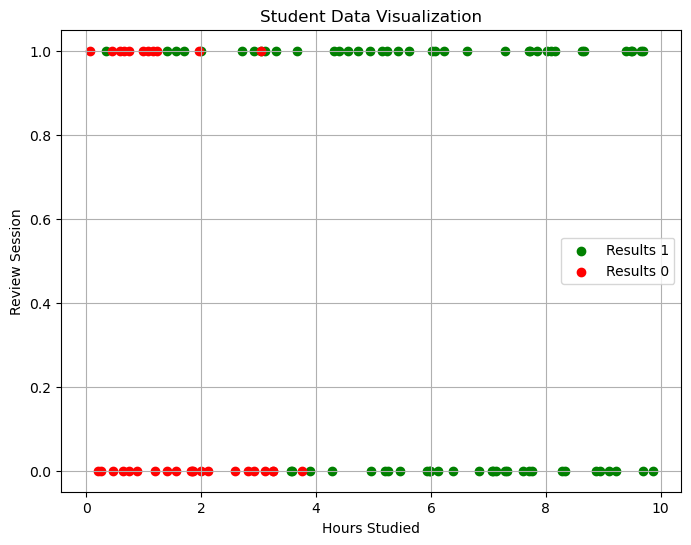

In [16]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure(figsize=(8, 6))

# Plotting the points where Results = 1
plt.scatter(dt['Hours_Studied'][dt['Results'] == 1], 
            dt['Review_Session'][dt['Results'] == 1], 
            color='green', label='Results 1')

# Plotting the points where Results = 0
plt.scatter(dt['Hours_Studied'][dt['Results'] == 0], 
            dt['Review_Session'][dt['Results'] == 0], 
            color='red', label='Results 0')

# Adding labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Student Data Visualization')
plt.legend()
plt.grid(True)
plt.show()

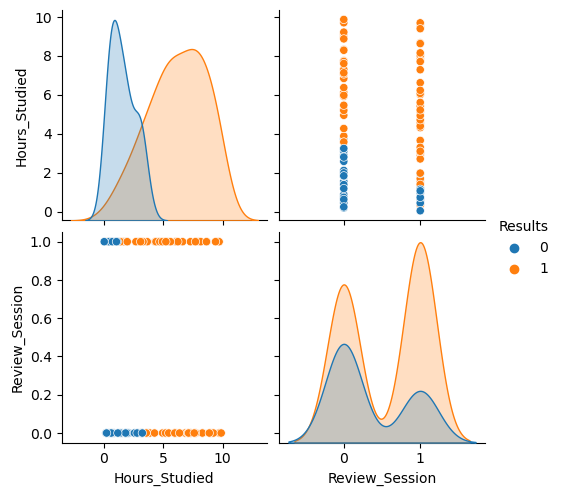

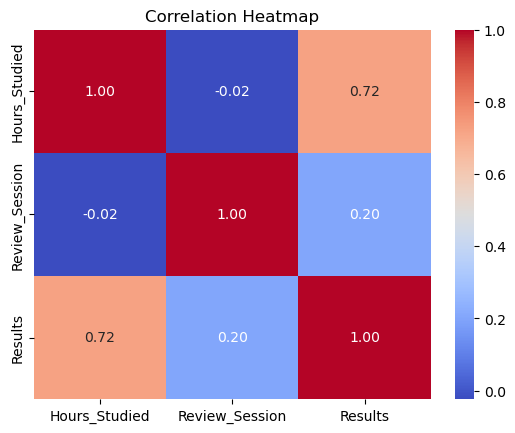

In [17]:
import seaborn as sns

# Create a pair plot
sns.pairplot(dt, hue='Results', diag_kind='kde')
plt.show()

# Create a heatmap to visualize the correlation matrix
correlation_matrix = dt.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = dt[['Hours_Studied', 'Review_Session']]
y = dt['Results']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model Coefficients:
          Feature  Coefficient
0   Hours_Studied     1.364992
1  Review_Session     1.877338

Accuracy: 0.93
AUC Score: 0.9761029411764706
[0.      0.      0.      0.03125 0.03125 0.0625  0.0625  0.1875  0.1875
 0.25    0.25    0.6875  0.6875  1.     ]
[0.         0.01470588 0.83823529 0.83823529 0.89705882 0.89705882
 0.94117647 0.94117647 0.97058824 0.97058824 0.98529412 0.98529412
 1.         1.        ]


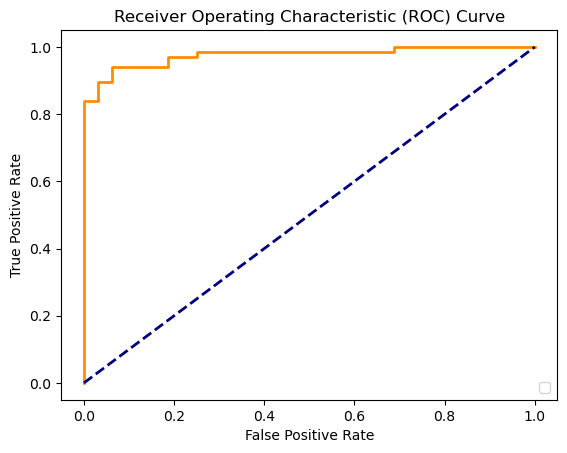

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming student_data is your DataFrame containing the dataset

# Separate features (X) and target variable (y)
X = dt[['Hours_Studied', 'Review_Session']]
y = dt['Results']

# print(y)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("Model Coefficients:")
print(coefficients)

# Make predictions and calculate accuracy
predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)
print("\nAccuracy:", accuracy)
# Calculate AUC and plot ROC curve
y_prob = model.predict_proba(X)[:,1]
# print(y_prob)
auc_score = roc_auc_score(y, y_prob)
print("AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y, y_prob)
# print(fpr)
# print(tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable
# X = student_data[['Hours_Studied', 'Review_Session']]
# y = student_data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predictions and accuracy for Linear Kernel SVM
linear_predictions = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Accuracy (Linear SVM):", linear_accuracy)

# SVM with RBF Kernel and Grid Search for Gamma
rbf_svm = SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy for RBF Kernel SVM
best_params = grid_search.best_params_
rbf_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
rbf_svm.fit(X_train, y_train)

# Predictions and accuracy for RBF Kernel SVM
rbf_predictions = rbf_svm.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print("Best Parameters for RBF Kernel SVM:", best_params)
print("Accuracy (RBF Kernel SVM):", rbf_accuracy)

Accuracy (Linear SVM): 0.85
Best Parameters for RBF Kernel SVM: {'C': 1, 'gamma': 1}
Accuracy (RBF Kernel SVM): 0.85
